#  Subject 1: CO2 concentration in the atmosphere since 1958

In 1958, Charles David Keeling initiated a measurement of the concentration of CO2 in the atmosphere at the Mauna Loa Observatory, Hawaii, United States which continues to this day. The initial goal was to study seasonal variation, but interest later shifted to studying the increasing trend in the context of climate change. In honor of Keeling, this dataset is often referred to as the "Keeling Curve" (see https://en.wikipedia.org/wiki/Keeling_Curve for the history and significance of this data).

The data is available on the Scripps Institute website. We use the file with weekly observations. Please note, this file is updated regularly with new observations.

In this computational document the following is done:

1. A graph is generated illustrating a periodic oscillation superimposed on a slower systematic evolution.
2. These two phenomena are separated. A simple, linear model is proposed for the slow contribution, its parameters are estimated and an extrapolation is attempted until 2025 (with the aim of validating the model through future observations). The periodic oscillation is characterized. 

To process the data read and downloaded from the web, and obtain results, code in Python language is used importing the Python necessary libraries.

We start by importing the necessary Python libraries

In [2]:
# Importing the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Download the data from the website and save a local copy of the downloaded version

In [3]:
# Downloading and loading data
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

In [4]:
# Load data from a local CSV file
data_file = "weekly_in_situ_co2.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

A first inspection of the data is carried out opening the .csv file and it is noted that the data, dates and CO2 concentrations, appear from line 44 in two columns.
The data in .csv format is loaded into a panda table taking into account the pre-inspection considerations and a first visualization of the columns is performed.

In [5]:
# Load data into a pandas table
# data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], index_col=[0], names = ['Date', 'Concentration'])
data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], names = ['Date', 'Concentration'])
# Displaying the first rows of data for verification
print(data.head())

        Date  Concentration
0 1958-03-29         316.19
1 1958-04-05         317.31
2 1958-04-12         317.69
3 1958-04-19         317.58
4 1958-04-26         316.48


We also pay attention to missing data

In [6]:
# All rows containing at least one null value (NaN) in a column are deleted
data = data.dropna()

The data from the pandas table is graphed, the CO2 concentration is graphed as a function of the date

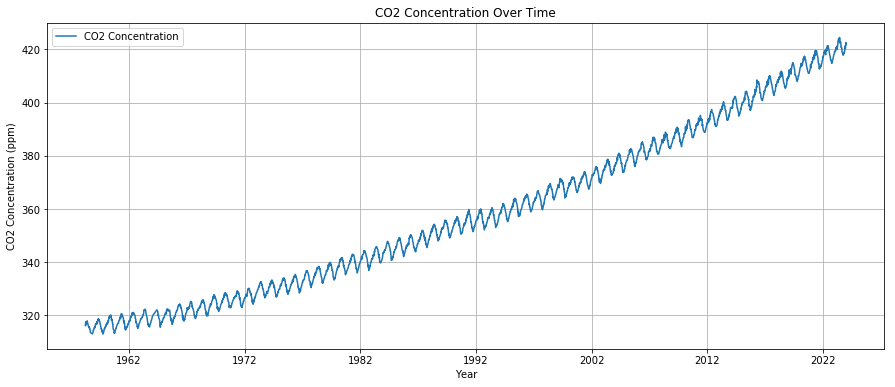

In [7]:
# Creation of the complete graph
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Concentration'], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

From the graph two superimposed phenomena are distinguished,  a periodic oscillation superimposed on a slow upward evolution (slow contribution).
For a better visualization of the periodic oscillation, only the last 300 rows of the table are graphed.

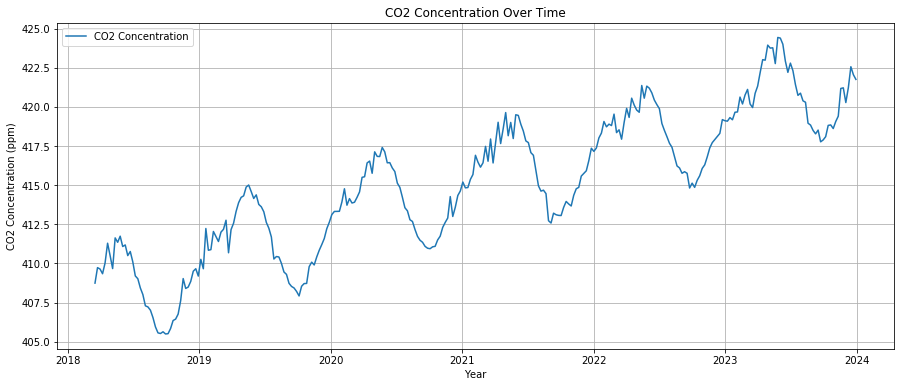

In [8]:
# Creation of the complete graph. Creating the graph to show the oscillation (last 300 rows of the table)
plt.figure(figsize=(15, 6))
plt.plot(data['Date'][-300:], data['Concentration'][-300:], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

We are interested in adding a column to the table with the year of measurement. This is useful to separate the two phenomena identified in the full data graph.

For this we first convert the date of the "date" column to the "datatime" type

In [9]:
# Convert the 'Date' column to "datatime" type
data['Date'] = pd.to_datetime(data['Date'])
# Extract the year from the 'Date' column and create a new 'Year' column
data['Year'] = data['Date'].dt.year
# Displaying the first rows of data for verification
print(data.head())

        Date  Concentration  Year
0 1958-03-29         316.19  1958
1 1958-04-05         317.31  1958
2 1958-04-12         317.69  1958
3 1958-04-19         317.58  1958
4 1958-04-26         316.48  1958


To separate the two phenomena, there are many ways of doing things. For this example, the concentrations of each year are averaged to obtain the average values per year and obtain a more linear graph (slow contribution), then the difference between the initial data and the average values of each year is calculated to study the periodic oscillation

In [10]:
# Slow contribution
# Determine the annual average of CO2 concentrations and create a new column 'Mean_CO2_Concentration'
data['Mean_CO2_Concentration'] = data.groupby('Year')['Concentration'].transform('mean')
# Displaying the first rows of data for verification
print(data.head())

        Date  Concentration  Year  Mean_CO2_Concentration
0 1958-03-29         316.19  1958                 315.474
1 1958-04-05         317.31  1958                 315.474
2 1958-04-12         317.69  1958                 315.474
3 1958-04-19         317.58  1958                 315.474
4 1958-04-26         316.48  1958                 315.474


A graph is made with the average CO2 concentration per year

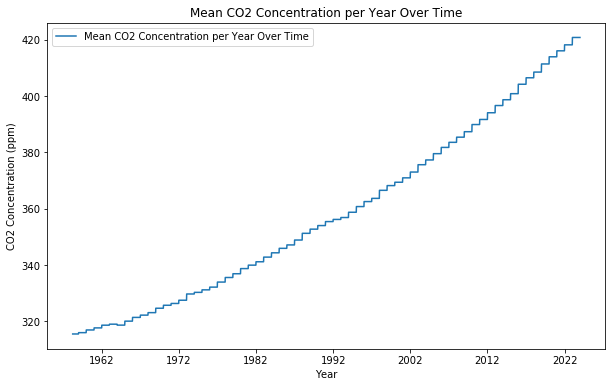

In [11]:
# Slow contribution. Creating the graph to show the average CO2 concentration per year over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Mean_CO2_Concentration'], label='Mean CO2 Concentration per Year Over Time')
plt.title('Mean CO2 Concentration per Year Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

The graph with the average values per year shows horizontal segments for each year which can give the wrong indication that the concentration is constant throughout the year.

To correct this aspect of the graph, a new graph is made but indicating the average CO2 concentration value for the year with a point.

In [12]:
# Slow contribution
# Determine the annual average of CO2 concentrations
annual_mean_co2 = data.groupby('Year')['Concentration'].mean()

# Rename the second column
annual_mean_co2 = annual_mean_co2.rename('Mean_CO2_Concentration')

# Displaying the first rows of data for verification
print(annual_mean_co2.head())

Year
1958    315.474000
1959    315.945417
1960    316.898868
1961    317.634038
1962    318.597708
Name: Mean_CO2_Concentration, dtype: float64


A graph is made with points that indicate the average CO2 concentration of the year

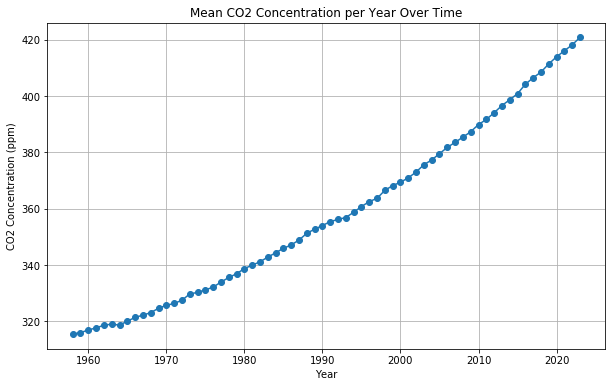

In [13]:
# Slow contribution. Creating the graph to show the average CO2 concentration per year over time
plt.figure(figsize=(10, 6))
plt.plot(annual_mean_co2.index, annual_mean_co2.values, label='Mean CO2 Concentration per Year Over Time', marker='o', linestyle='-')
plt.title('Mean CO2 Concentration per Year Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.grid(True)
plt.show()

We now proceed to analyze and determine the periodic oscillation.

For this, a new column "Oscilation" is created in the Pandas table with the difference between the original CO2 concentration value and the average value per year calculated in the "Mean_CO2_Concentration" column

In [14]:
# Periodic oscillation. Obtaining the oscillation and creating a new colony 'Oscillation'
data['Oscilation'] = data['Concentration']-data['Mean_CO2_Concentration']
# Displaying the first rows of data for verification
print(data.head())

        Date  Concentration  Year  Mean_CO2_Concentration  Oscilation
0 1958-03-29         316.19  1958                 315.474       0.716
1 1958-04-05         317.31  1958                 315.474       1.836
2 1958-04-12         317.69  1958                 315.474       2.216
3 1958-04-19         317.58  1958                 315.474       2.106
4 1958-04-26         316.48  1958                 315.474       1.006


A graph is made with the oscilation of the CO2 concentration over the time

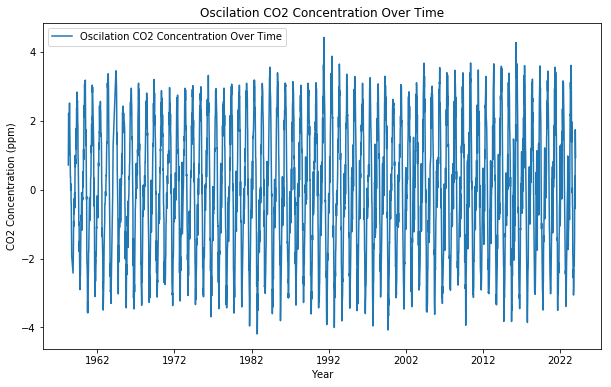

In [39]:
# Periodic oscillation. Creation of the graph to show the oscillation of the CO2 concentration over the time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Oscilation'], label='Oscilation CO2 Concentration Over Time')
plt.title('Oscilation CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

For a better visualization of the periodic oscillation, only the last 300 rows of the table are graphed.

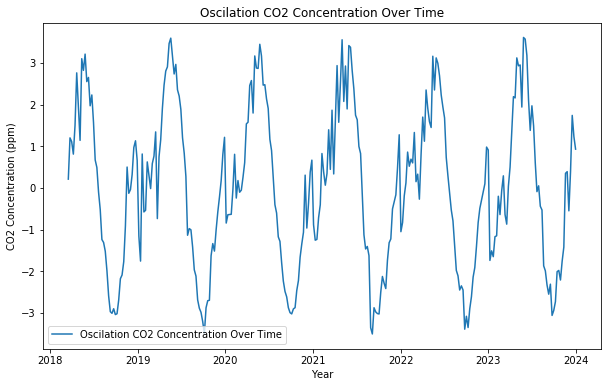

In [41]:
# Periodic oscillation. Creation of the graph to show the oscillation of the CO2 concentration over the time (last 300 rows of the table)
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][-300:], data['Oscilation'][-300:], label='Oscilation CO2 Concentration Over Time')
plt.title('Oscilation CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

Slow contribution. For the slow contribution and then subsequent extrapolation, no complicated techniques is applied. We try to fit a straight line. Likewise, one can fit a straight line, a parabola, an exponential, and then select what works best. Our first objective is not to implement advanced mathematical techniques, but to write a clear and understandable computer document

Model the slow evolution for extrapolation to 2025

In [17]:
# Slow contribution. Model the slow evolution for extrapolation to 2025
# Importing the necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

In [42]:
# Slow contribution. Modelling slow change using linear regression
X = np.arange(len(data)).reshape(-1, 1)  # Independent variable: number of weeks
y = data['Mean_CO2_Concentration'].values.reshape(-1, 1) # Dependent variable: CO2 concentration

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Linear regression model parameters
# Get the regression coefficients and the intercept
coeficiente = model.coef_[0][0]
intercepto = model.intercept_[0]

# Obtain the coefficient of determination (R²)
r_cuadrado = model.score(X, y)

# Print model parameters
print("Regression coefficient:", coeficiente)
print("Intercept:", intercepto)
print("R-squared (R²):", r_cuadrado)

# Predicting CO2 concentration in 2025
weeks_in_2025 = (2025 - data['Date'].dt.year.min()) * 52
predicted_CO2_2025 = model.predict([[weeks_in_2025]])

print("Predicted CO2 concentration in 2025:", predicted_CO2_2025[0][0], "ppm")

Regression coefficient: 0.03169965286205089
Intercept: 305.8667902052942
R-squared (R²): 0.9813151125069396
Predicted CO2 concentration in 2025: 416.3083807766795 ppm


Here above, it is considered a linear model, or line, that verifies the linear function Y=M.X + H with M: Regression coefficient, H: Intercept, and R-squared (R²): proportion of the total variability of the variable dependent that is explained by the model

To improve the document, a plot is more useful than the regression parameters

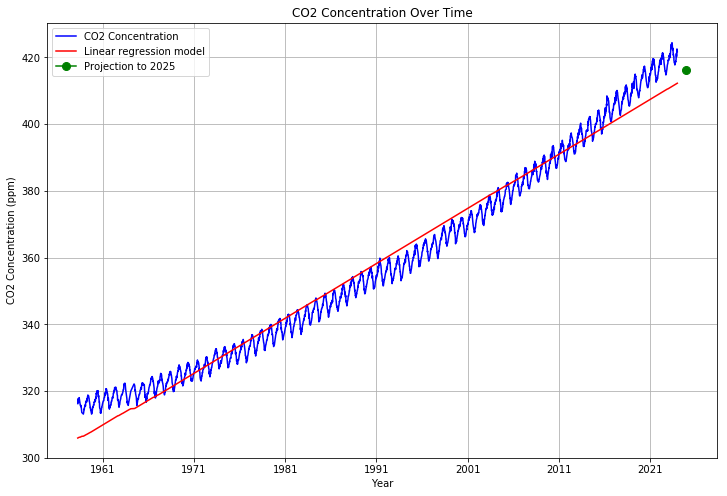

In [47]:
# Visualisation of the temporal evolution of CO2 concentration
plt.figure(figsize=(12, 8))  # Size of the figure
plt.plot(data['Date'], data['Concentration'], label='CO2 Concentration', color='blue')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')

# Plot the linear regression model and the projection
plt.plot(data['Date'], model.predict(X), label='Linear regression model', color='red')
plt.plot(pd.to_datetime(['2025-01-01']), predicted_CO2_2025, marker='o', markersize=8, label='Projection to 2025', color='green')

plt.legend()
plt.grid(True)
plt.show()

Periodic oscillation. For this step, we have already separated the oscillation phenomena in the "oscillation" column of the pandas table and now we characterised them by their amplitude and frequency.

In [48]:
# Periodic oscillation. Characterisation of the oscillation
# Importing the necessary libraries
# import numpy as np
# from scipy.fft import fft 

"numpy as np" is already included when determining the linear regression model

"from scipy.fft import fft) is having problems loading, we may be using a version of SciPy earlier than 1.4.0. The fft function has been added in SciPy version 1.4.0.
To solve the problem, we can use numpy's fft function instead, since numpy also provides functions to perform the Fourier transform

In [50]:
# Periodic oscillation
# Displaying the first rows of data for verification
print(data.head())

        Date  Concentration  Year  Mean_CO2_Concentration  Oscilation
0 1958-03-29         316.19  1958                 315.474       0.716
1 1958-04-05         317.31  1958                 315.474       1.836
2 1958-04-12         317.69  1958                 315.474       2.216
3 1958-04-19         317.58  1958                 315.474       2.106
4 1958-04-26         316.48  1958                 315.474       1.006


 Periodic oscillation
 
 Characterisation of the periodic oscillation, we use the Fourier transform to characterise the oscillation
 

In [55]:
# Periodic oscillation. Calculate the Fourier transform of the CO2 oscilation time series.
co2_oscilation_fft = np.fft.fft(data['Oscilation'])

# Calculate the frequencies corresponding to the Fourier components
n = len(data)
frequencies = np.fft.fftfreq(n, d=1)  # Frequency in cycles per week

# Find the maximum frequency and amplitude
max_freq_index = np.argmax(np.abs(co2_oscilation_fft))
max_freq = frequencies[max_freq_index]
max_amplitude = np.abs(co2_oscilation_fft[max_freq_index])

# Calculate the inverse frequency in weeks per cycle.
max_freq_week_cycles = 1 / max_freq

print("Dominant oscillation frequency:", max_freq_week_cycles, "week/cycles")
print("Maximum oscillation amplitude in CO2 oscilation:", max_amplitude, "ppm")

Dominant oscillation frequency: 51.661538461538456 week/cycles
Maximum oscillation amplitude in CO2 oscilation: 3207.2901558554163 ppm


Characterising a periodic oscillation by calculating the Fourier transform gives values that are difficult to understand a priori, so another method is chosen to characterise the oscillation

Remembering the periodic oscillation in CO2 concentration (column "Oscilation" in the pandas table)

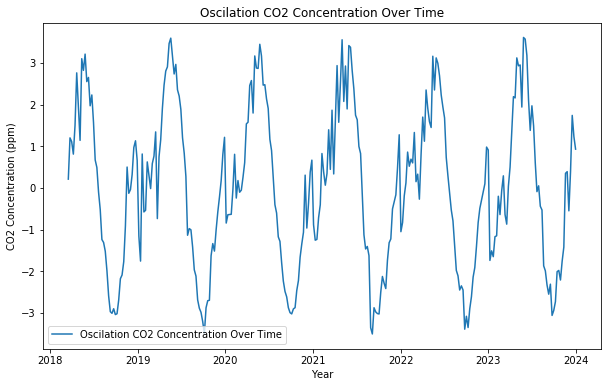

In [56]:
# Periodic oscillation. Creation of the graph to show the oscillation of the CO2 concentration over the time (last 300 rows of the table)
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][-300:], data['Oscilation'][-300:], label='Oscilation CO2 Concentration Over Time')
plt.title('Oscilation CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

 Characterisation of the periodic oscillation, determination of the amplitudes max and min

In [54]:
# Periodic oscillation. Calculate the maximum and minimum value of the 'Oscillation' column
maximum_value = data['Oscilation'].max()
minimum_value = data['Oscilation'].min()

print("Maximum oscillation amplitude in CO2 periodic oscilation:", maximum_value, "ppm")
print("Minimum oscillation amplitude in CO2 periodic oscilation:", minimum_value, "ppm")

Maximum oscillation amplitude in CO2 periodic oscilation: 4.419807692307586 ppm
Minimum oscillation amplitude in CO2 periodic oscilation: -4.191923076923047 ppm


From the graph it is observed that maximum oscillation values around 3 ppm are frequent and the same is true for minimum oscillation values around -3 ppm"

 Characterisation of the periodic oscillation, determination of the oscilation frecuency
 
 Searching for concentrations equal to zero

In [61]:
# Periodic oscillation. Find the indices where the concentration is equal to zero
zero_indices = data.index[data['Oscilation'] == 0].tolist()

# Determination of the time between two consecutive zero crossings
times_between_steps = []
for i in range(1, len(zero_indices)):
    time_between_steps = data.iloc[zero_indices[i]]['Date'] - data.iloc[zero_indices[i-1]]['Date']
    times_between_steps.append(time_between_steps)

# Determination of the average time between zero crossings
# average_time_between_steps = sum(times_between_steps, pd.Timedelta(0)) / len(times_between_steps)

# print("Average time between zero steps:", average_time_between_steps)

This form of determination does not give results because the CO2 concentration data from the oscillation are not zero but have low values, both positive and negative, so the option adopted is the searching of these zero crossings

Searching for zero crossings


In [77]:
# Periodic oscillation. Identifying zero crossings
crosses_by_zero = (data['Oscilation'] * data['Oscilation'].shift(1) < 0) & (data['Oscilation'] != 0) 
# Displaying verification of type
print("crosses_by_zero is of type :",type(crosses_by_zero))

crosses_by_zero is of type : <class 'pandas.core.series.Series'>


In [70]:
# Displaying the first rows of data for verification
print(crosses_by_zero.head())

0    False
1    False
2    False
3    False
4    False
Name: Oscilation, dtype: bool


"crosses_by_zero" is a pandas series which contains booleans values, True in the rows where a zero crossing occurs in the "Oscilation" column of the DataFrame and False in the other rows. This pandas series is then used to filter the DataFrame and obtain the rows corresponding to the zero crossings

Finally we get the Average time between zero crossings we are looking for

In [71]:
# Filter lines containing zero crossings
data_crosses_by_zero = data[crosses_by_zero]

# Calculate the times between consecutive zero crossings
times_between_crosses = data_crosses_by_zero['Date'].diff().mean()

print("Average time between zero crossings:", times_between_crosses)

Average time between zero crossings: 69 days 15:11:01.224489


# Subject 4: Latency and capacity estimation for a network connection from asymmetric measurements


In [28]:
# Importation des bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [29]:
# Importation des bibliothèques nécessaires
url_liglab2 = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/liglab2.log.gz"
url_stackoverflow = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/stackoverflow.log.gz"

# Charger les données dans un DataFrame pandas
df_liglab2 = pd.read_csv(url_liglab2, sep=" ", header=None)
df_stackoverflow = pd.read_csv(url_stackoverflow, sep=" ", header=None)

In [30]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())


                     0     1      2     3                   4               5  \
0  [1421761682.052172]   665  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
1  [1421761682.277315]  1373  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
2  [1421761682.502054]   262  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
3  [1421761682.729257]  1107  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
4  [1421761682.934648]  1128  bytes  from  lig-publig.imag.fr  (129.88.11.7):   

            6       7          8   9  
0  icmp_seq=1  ttl=60  time=22.5  ms  
1  icmp_seq=1  ttl=60  time=21.2  ms  
2  icmp_seq=1  ttl=60  time=21.2  ms  
3  icmp_seq=1  ttl=60  time=23.3  ms  
4  icmp_seq=1  ttl=60  time=1.41  ms  


In [31]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

                     0     1      2     3                  4  \
0  [1421771203.082701]  1257  bytes  from  stackoverflow.com   
1  [1421771203.408254]   454  bytes  from  stackoverflow.com   
2  [1421771203.739730]   775  bytes  from  stackoverflow.com   
3  [1421771204.056630]  1334  bytes  from  stackoverflow.com   
4  [1421771204.372224]    83  bytes  from  stackoverflow.com   

                    5           6       7         8   9  
0  (198.252.206.140):  icmp_seq=1  ttl=50  time=120  ms  
1  (198.252.206.140):  icmp_seq=1  ttl=50  time=120  ms  
2  (198.252.206.140):  icmp_seq=1  ttl=50  time=126  ms  
3  (198.252.206.140):  icmp_seq=1  ttl=50  time=112  ms  
4  (198.252.206.140):  icmp_seq=1  ttl=50  time=111  ms  


In [32]:
import numpy as np

# Définir une fonction pour extraire les informations pertinentes de chaque ligne
def process_ping_data(df):
    df.dropna(inplace=True)  # Supprimer les lignes incomplètes
    df.columns = ["date", "size", "bytes", "from", "url", "ip", "icmp","ttl","time", "ms"]  # Nommez les colonnes
    df["time"] = df["time"].str[5:].astype(float)  # Extraire le temps en ms et convertir en float (supprimer la chaîne "time-")
    df["date"] = df["date"].str[1:18] # Les [ ] sont supprimés donc la date est extraite de la première colonne
    df["date"] = pd.to_datetime(df["date"], unit='s') # La date obtenue précédemment est convertie au format "datetime"
    return df

# Traiter les données ping pour liglab2 et stackoverflow
df_liglab2 = process_ping_data(df_liglab2)
df_stackoverflow = process_ping_data(df_stackoverflow)


In [33]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())

                        date  size  bytes  from                 url  \
0 2015-01-20 13:48:02.052172   665  bytes  from  lig-publig.imag.fr   
1 2015-01-20 13:48:02.277315  1373  bytes  from  lig-publig.imag.fr   
2 2015-01-20 13:48:02.502054   262  bytes  from  lig-publig.imag.fr   
3 2015-01-20 13:48:02.729257  1107  bytes  from  lig-publig.imag.fr   
4 2015-01-20 13:48:02.934648  1128  bytes  from  lig-publig.imag.fr   

               ip        icmp     ttl   time  ms  
0  (129.88.11.7):  icmp_seq=1  ttl=60  22.50  ms  
1  (129.88.11.7):  icmp_seq=1  ttl=60  21.20  ms  
2  (129.88.11.7):  icmp_seq=1  ttl=60  21.20  ms  
3  (129.88.11.7):  icmp_seq=1  ttl=60  23.30  ms  
4  (129.88.11.7):  icmp_seq=1  ttl=60   1.41  ms  


In [34]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

                        date  size  bytes  from                url  \
0 2015-01-20 16:26:43.082701  1257  bytes  from  stackoverflow.com   
1 2015-01-20 16:26:43.408254   454  bytes  from  stackoverflow.com   
2 2015-01-20 16:26:43.739730   775  bytes  from  stackoverflow.com   
3 2015-01-20 16:26:44.056630  1334  bytes  from  stackoverflow.com   
4 2015-01-20 16:26:44.372224    83  bytes  from  stackoverflow.com   

                   ip        icmp     ttl   time  ms  
0  (198.252.206.140):  icmp_seq=1  ttl=50  120.0  ms  
1  (198.252.206.140):  icmp_seq=1  ttl=50  120.0  ms  
2  (198.252.206.140):  icmp_seq=1  ttl=50  126.0  ms  
3  (198.252.206.140):  icmp_seq=1  ttl=50  112.0  ms  
4  (198.252.206.140):  icmp_seq=1  ttl=50  111.0  ms  


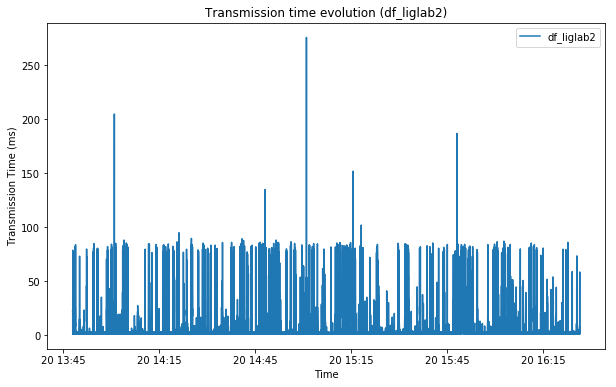

In [35]:
# Graphique du temps de transmission dans le temps
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["date"], df_liglab2["time"], label="df_liglab2")
plt.xlabel("Time")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_liglab2)")
plt.legend()
plt.show()

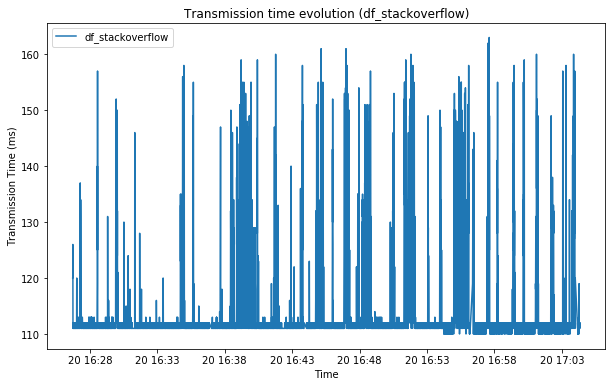

In [36]:
# Graphique du temps de transmission dans le temps
plt.figure(figsize=(10, 6))
plt.plot(df_stackoverflow["date"], df_stackoverflow["time"], label="df_stackoverflow")
plt.xlabel("Time")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_stackoverflow)")
plt.legend()
plt.show()

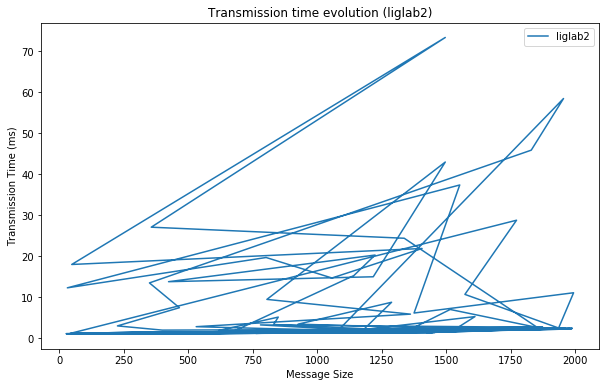

In [37]:
# Graph of transmission time based on message size
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["size"][-300:], df_liglab2["time"][-300:], label="liglab2")
plt.xlabel("Message Size")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (liglab2)")
plt.legend()
plt.show()

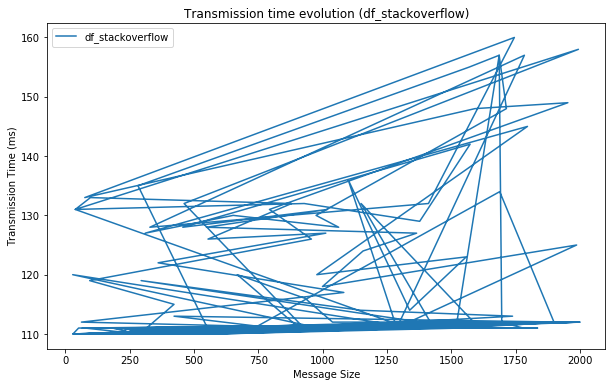

In [38]:
# Graph of transmission time based on message size
plt.figure(figsize=(10, 6))
plt.plot(df_stackoverflow["size"][-300:], df_stackoverflow["time"][-300:], label="df_stackoverflow")
plt.xlabel("Message Size")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_stackoverflow)")
plt.legend()
plt.show()